In [307]:
# Import
import pandas as pd
import numpy as np 

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,ConfusionMatrixDisplay,RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [308]:
df = pd.read_excel("bank_marketing.xlsx")
print(df.shape)
df.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [310]:
### Rename the columns
dataset = df.rename ( columns = { "y": "subscription"})
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [311]:
#Basics stats for numerical columns
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [312]:
#Basics stats for categorical columns
dataset.describe(include=["object"])

,job,marital,education,default,housing,loan,contact,month,poutcome,subscription
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [313]:
dataset["subscription"].value_counts()

no     39922
yes     5289
Name: subscription, dtype: int64

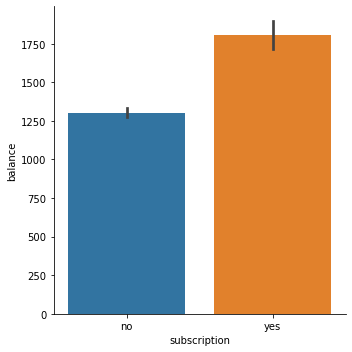

In [314]:
sns.catplot(x="subscription", y ="balance", data= dataset, kind="bar");

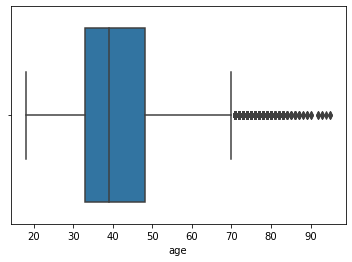

In [315]:
sns.boxplot(x="age",data=dataset);

In [316]:
# Drop lines containing invalid values or outliers (Unemployment)
print("Maximum :",dataset['age'].mean() + 3*dataset['age'].std())
print("Minimum :",dataset['age'].mean() - 3*dataset['age'].std())
to_keep = (dataset['age'] < 71)
dataset = dataset.loc[to_keep,:] 

Maximum : 72.79249633725466
Minimum : 9.079924091402077


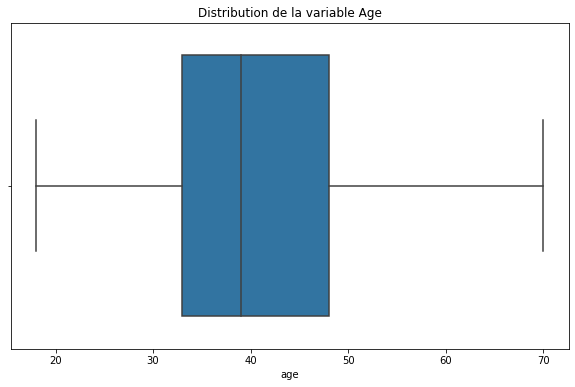

In [317]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=dataset, x="age").set(title='Distribution de la variable Age');

In [318]:
dataset.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

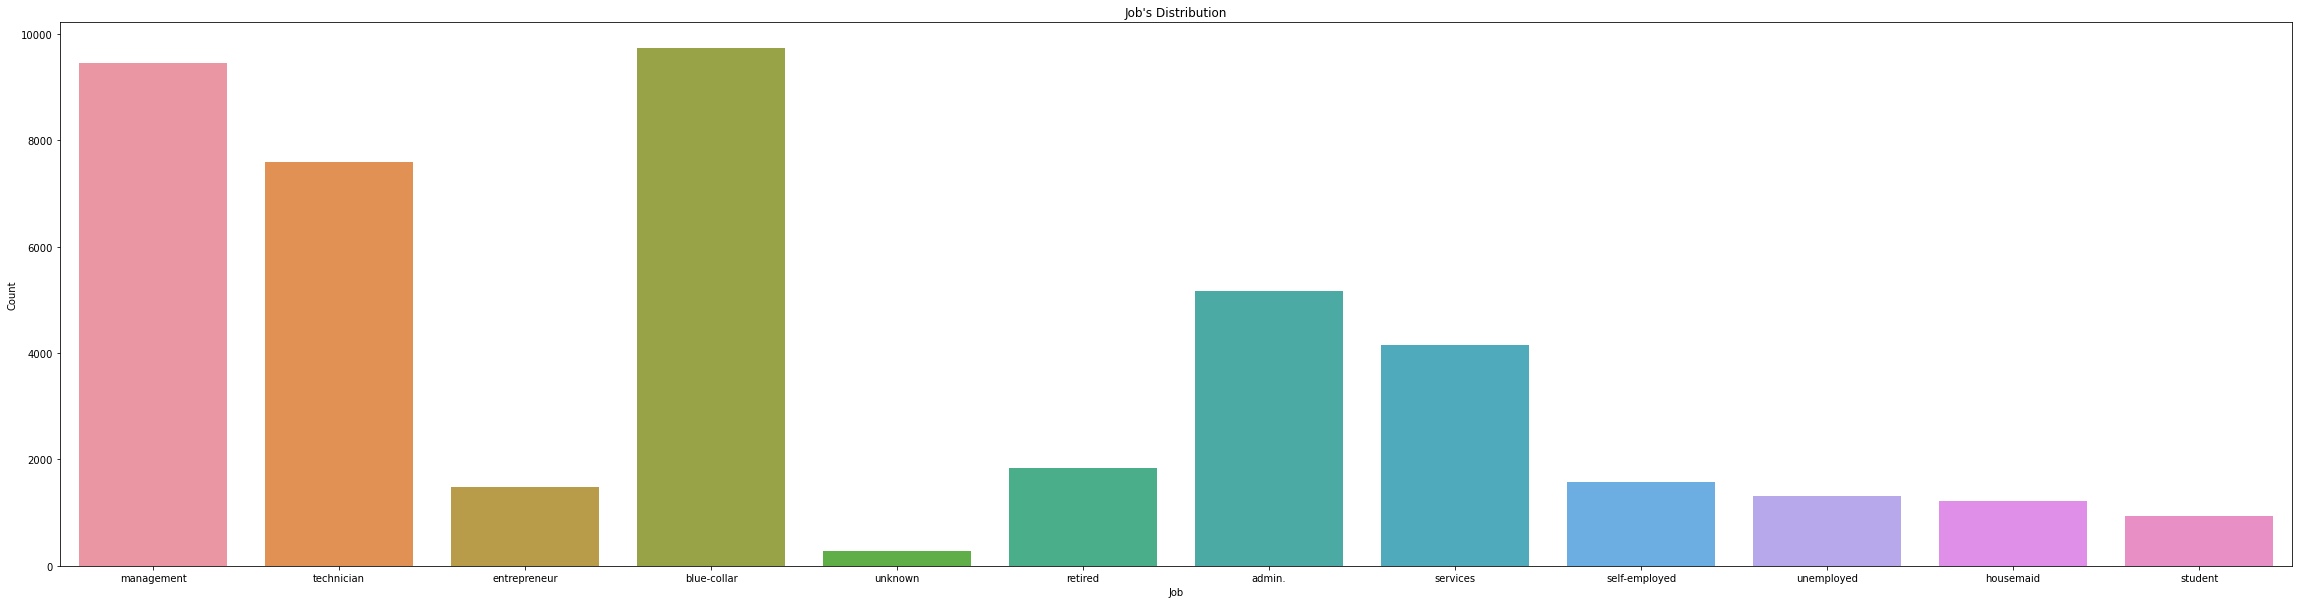

In [319]:
plt.figure(figsize = (40,10))
sns.countplot(x="job", data= dataset)
plt.xlabel("Job")
plt.ylabel("Count")
plt.title("Job's Distribution")
plt.show()

In [320]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscription'],
      dtype='object')

### Logistic Regression

In [321]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ['age','job','marital','education','default','balance','housing','loan','contact','day','month',
                 'duration','campaign','pdays','previous','poutcome']
target_variable = 'subscription'
X = dataset.loc[:,features_list]
y = dataset.loc[:,target_variable]
print("...Done.")
print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.
Y : 
0    no
1    no
2    no
3    no
4    no
Name: subscription, dtype: object

X :
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  
0  unknown    5   may       261         1     -1         0  unknown  
1  unknown    5   may       151         1     -1         0  unknown  
2  unknown    5   may        76         1     -1         0  unknown  
3  unknown    5   may        92         1     -1         0  unknown  
4  unknown    5   may       198         1     -1         0  unknown  


In [322]:
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)


Found numeric features  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Found categorical features  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [323]:
# Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=y)

In [324]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [325]:
#Create pipeline for categoric features
categorical_transformer = OneHotEncoder(drop="first")

In [326]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ])

In [327]:
#Preprocessing on train set
X_train = preprocessor.fit_transform(X_train)

print(X_train[:5]) 

  (0, 2)	1.0
  (0, 11)	1.0
  (0, 14)	1.0
  (0, 20)	1.0
  (0, 26)	1.0
  (0, 34)	1.0
  (0, 35)	0.4450251449143208
  (0, 36)	-0.44939020880359365
  (0, 37)	-0.814715730338384
  (0, 38)	-0.6122867044582884
  (0, 39)	-0.5710365300313939
  (0, 40)	-0.4092192124293676
  (0, 41)	-0.240119756328168
  (1, 3)	1.0
  (1, 12)	1.0
  (1, 14)	1.0
  (1, 24)	1.0
  (1, 34)	1.0
  (1, 35)	-1.4636722591102866
  (1, 36)	0.46590526664298837
  (1, 37)	1.4675418176468298
  (1, 38)	0.03596016219911493
  (1, 39)	-0.5710365300313939
  (1, 40)	-0.4092192124293676
  (1, 41)	-0.240119756328168
  :	:
  (3, 0)	1.0
  (3, 11)	1.0
  (3, 13)	1.0
  (3, 17)	1.0
  (3, 23)	1.0
  (3, 34)	1.0
  (3, 35)	-1.0618412266840536
  (3, 36)	-0.32746277482667285
  (3, 37)	-1.5354286402284514
  (3, 38)	-0.3599750497712751
  (3, 39)	-0.5710365300313939
  (3, 40)	-0.4092192124293676
  (3, 41)	-0.240119756328168
  (4, 8)	1.0
  (4, 12)	1.0
  (4, 13)	1.0
  (4, 21)	1.0
  (4, 34)	1.0
  (4, 35)	-0.8609257104709369
  (4, 36)	-0.4379700083760033
  (4

In [328]:
# Encoding labels

print("Encoding labels...")

print(y_train)
print()
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(y_train)
print("...Done")
print(Y_train[:5])
print()

Encoding labels...
9897      no
27749     no
41703    yes
29466     no
22406     no
        ... 
3737      no
13280     no
32489     no
25079     no
1489      no
Name: subscription, Length: 35779, dtype: object

...Done
[0 0 1 0 0]



In [329]:
#Preprocessing on test set
X_test = preprocessor.transform(X_test)
print(X_test[:5])
#Label encoding
Y_test = label_encoder.transform(Y_test)
print(Y_test[:5])

  (0, 3)	1.0
  (0, 12)	1.0
  (0, 14)	1.0
  (0, 25)	1.0
  (0, 34)	1.0
  (0, 35)	-0.7604679523643786
  (0, 36)	-0.4161372722644334
  (0, 37)	-0.9348345486533952
  (0, 38)	-0.3832653563577686
  (0, 39)	-0.5710365300313939
  (0, 40)	-0.4092192124293676
  (0, 41)	-0.240119756328168
  (1, 8)	1.0
  (1, 12)	1.0
  (1, 13)	1.0
  (1, 16)	1.0
  (1, 23)	1.0
  (1, 34)	1.0
  (1, 35)	-0.9613834685774951
  (1, 36)	-0.44099300260683605
  (1, 37)	-1.6555474585434626
  (1, 38)	0.478475987342492
  (1, 39)	-0.5710365300313939
  (1, 40)	-0.4092192124293676
  (1, 41)	-0.240119756328168
  :	:
  (3, 14)	1.0
  (3, 17)	1.0
  (3, 25)	1.0
  (3, 34)	1.0
  (3, 35)	-1.26275674289717
  (3, 36)	-0.1611980921308717
  (3, 37)	0.14623481618170608
  (3, 38)	1.336335613278337
  (3, 39)	-0.5710365300313939
  (3, 40)	-0.4092192124293676
  (3, 41)	-0.240119756328168
  (4, 3)	1.0
  (4, 11)	1.0
  (4, 14)	1.0
  (4, 17)	1.0
  (4, 20)	1.0
  (4, 28)	1.0
  (4, 34)	1.0
  (4, 35)	-0.05726364561847061
  (4, 36)	-0.2579339075175196
  (4, 

In [330]:
# Train the model
print("Train model...")
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [331]:
# Predictions on train set
Y_train_pred = classifier.predict(X_train)
print(Y_train_pred)

[0 0 1 ... 0 0 0]


In [332]:
#Probabilities on training set
Y_train_prob = classifier.predict_proba(X_train)
print(Y_train_prob)

[[0.97445089 0.02554911]
 [0.89888415 0.10111585]
 [0.06194813 0.93805187]
 ...
 [0.87935662 0.12064338]
 [0.93455922 0.06544078]
 [0.99516518 0.00483482]]


In [333]:
# Predictions on test set
Y_test_pred = classifier.predict(X_test)
print(Y_test_pred)

[0 0 0 ... 0 0 0]


In [334]:
Y_test_prob = classifier.predict_proba(X_test)
print(Y_test_prob)

[[0.92270679 0.07729321]
 [0.76585866 0.23414134]
 [0.94745385 0.05254615]
 ...
 [0.96289471 0.03710529]
 [0.98435095 0.01564905]
 [0.99871308 0.00128692]]


In [335]:
# Accuracy and F1_score
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

accuracy on training set :  0.9047765449006401
accuracy on test set :  0.9053102291783119

f1-score on training set :  0.4495071901761189
f1-score on test set :  0.4489264801561484



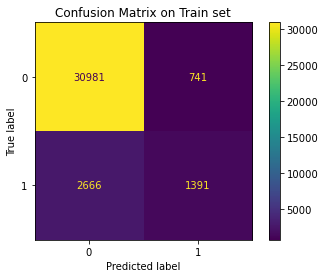

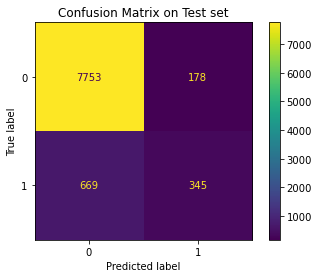

In [336]:
# Visualize confusion matrices
_ , ax = plt.subplots() 
ax.set(title="Confusion Matrix on Train set") 
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) 
plt.show()

_ , ax = plt.subplots() 
ax.set(title="Confusion Matrix on Test set") 
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) 
plt.show()

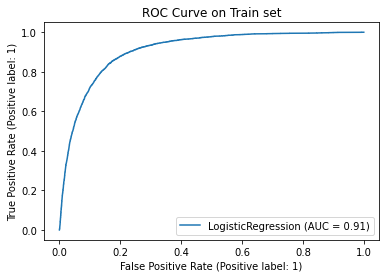

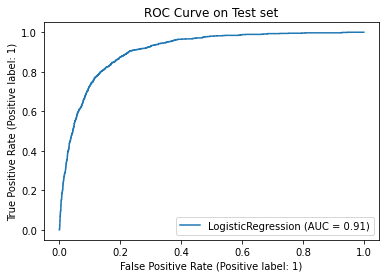

In [337]:
# Visualize ROC curves
_ , ax = plt.subplots() 
ax.set(title="ROC Curve on Train set") 
RocCurveDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) 
plt.show()

_ , ax = plt.subplots() 
ax.set(title="ROC Curve on Test set") 
RocCurveDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) 
plt.show()